# Optimizer

## Initialize the dataset

In [11]:
import torch
import torchvision
import torchvision.transforms as transforms
import tqdm

def load_mnist_data(root_path='./data', batch_size=4):
    transform = transforms.Compose(
        [transforms.ToTensor(),
        transforms.Normalize((0.5), (0.5))]
    )

    trainset = torchvision.datasets.MNIST(root=root_path, train=True, download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

    testset = torchvision.datasets.MNIST(root=root_path, train=False, download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

    return trainloader, testloader

## Define the neural network structure

In [12]:
import torch.nn as nn

model = nn.Sequential(
    nn.Linear(784, 32),  # input layer (do not change the in_features size of this layer - we need it later)
    #nn.ReLU(),
    nn.Linear(32, 32),
    #nn.ReLU(),
    # your layers
    nn.Linear(32, 10)  # you can change the in_features of this layer but let the out_features at size 10 here - we need it layer
)

## Training loop

In [13]:
from typing import Callable
from torch.optim import Optimizer

def train_model(
    model: nn.Module, loss_fn: Callable, optimizer: Optimizer,
    batch_size: int = 4, epochs: int = 10
):
    # we only consider the mnist train data for this example
    train_loader, _ = load_mnist_data(batch_size=batch_size)

    losss = []

    device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
    criterion = loss_fn

    for epoch in range(epochs):
        running_loss = 0.0
        running_accuracy = []
        for imgs, targets in tqdm.tqdm(train_loader, desc=f'Training iteration {epoch + 1}'):
            imgs, targets = imgs.to(device=device), targets.to(device=device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = model(imgs.reshape(imgs.shape[0], -1))
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

            # print statistics
            

            running_loss += loss.item()

            # Calculate the Accuracy (how many of all samples are correctly classified?)
            max_outputs = torch.max(outputs, dim=1).indices
            accuracy = (max_outputs.detach() == targets.detach()).to(dtype=torch.float32).mean()
            running_accuracy.append(accuracy)

        mean_loss = []
        mean_loss.append(running_loss / len(train_loader))
        mean_accuracy = []
        mean_accuracy.append(torch.tensor(running_accuracy).mean())
        print(f'Epoch {epoch + 1} finished with loss: {mean_loss} and accuracy {mean_accuracy}')

        print(f'Epoch {epoch + 1} finished with loss: {running_loss / len(train_loader):.3f} and accuracy {torch.tensor(running_accuracy).mean():.3f}')

    return mean_loss

## Define the optimizers

In [14]:
from torch.optim import SGD, Adagrad, RMSprop, Adam 

# Your code here


def my_SGD(model):
    optimizer = SGD(model.parameters(), lr = 0.001)
    return optimizer

def my_SGD_momentum(model):
    optimizer = SGD(model.parameters(), lr=0.001, momentum=0.9)
    return optimizer

def my_Adagrad(model):
    optimizer = Adagrad(model.parameters(), lr=0.001)
    return optimizer

def my_RMSprop(model):
    optimizer = RMSprop(model.parameters(), lr=0.001)
    return optimizer

def my_Adam(model):
    optimizer = Adam(model.parameters(), lr=0.001)
    return optimizer



## Run the training loop with different optimizers

In [15]:

import copy

results = {}
ops = ['my_SGD', 'my_SGD_momentum', 'my_Adagrad', 'my_RMSprop', 'my_Adam']
C = nn.CrossEntropyLoss()

lr = 0.001
momentum = 0.9

for i in ops:
    COPY_model = copy.deepcopy(model)
    if i == 'my_SGD':
        results[i] = train_model(COPY_model, C, my_SGD(COPY_model), batch_size=4, epochs=10)
    elif i == 'my_SGD_momentum':
        results[i] = train_model(COPY_model, C, my_SGD_momentum(COPY_model), batch_size=4, epochs=10)
    elif i == 'my_Adagrad':
        results[i] = train_model(COPY_model, C, my_Adagrad(COPY_model), batch_size=4, epochs=10)
    elif i == 'my_RMSprop':
        results[i] = train_model(COPY_model, C, my_RMSprop(COPY_model), batch_size=4, epochs=10)
    elif i == 'my_Adam':
        results[i] = train_model(COPY_model, C, my_Adam(COPY_model), batch_size=4, epochs=10)

print(results)





Training iteration 1: 100%|██████████| 15000/15000 [00:08<00:00, 1755.14it/s]


Epoch 1 finished with loss: [0.6834096931566407] and accuracy [tensor(0.8119)]
Epoch 1 finished with loss: 0.683 and accuracy 0.812


Training iteration 2: 100%|██████████| 15000/15000 [00:08<00:00, 1731.99it/s]


Epoch 2 finished with loss: [0.34312622307644536] and accuracy [tensor(0.9008)]
Epoch 2 finished with loss: 0.343 and accuracy 0.901


Training iteration 3: 100%|██████████| 15000/15000 [00:08<00:00, 1765.73it/s]


Epoch 3 finished with loss: [0.3165232943756739] and accuracy [tensor(0.9089)]
Epoch 3 finished with loss: 0.317 and accuracy 0.909


Training iteration 4: 100%|██████████| 15000/15000 [00:08<00:00, 1742.49it/s]


Epoch 4 finished with loss: [0.3046761655395928] and accuracy [tensor(0.9134)]
Epoch 4 finished with loss: 0.305 and accuracy 0.913


Training iteration 5: 100%|██████████| 15000/15000 [00:08<00:00, 1756.67it/s]


Epoch 5 finished with loss: [0.29764723153677963] and accuracy [tensor(0.9156)]
Epoch 5 finished with loss: 0.298 and accuracy 0.916


Training iteration 6: 100%|██████████| 15000/15000 [00:08<00:00, 1762.71it/s]


Epoch 6 finished with loss: [0.29186574572380825] and accuracy [tensor(0.9177)]
Epoch 6 finished with loss: 0.292 and accuracy 0.918


Training iteration 7: 100%|██████████| 15000/15000 [00:08<00:00, 1769.81it/s]


Epoch 7 finished with loss: [0.2887038177353951] and accuracy [tensor(0.9177)]
Epoch 7 finished with loss: 0.289 and accuracy 0.918


Training iteration 8: 100%|██████████| 15000/15000 [00:08<00:00, 1764.09it/s]


Epoch 8 finished with loss: [0.28526466441278076] and accuracy [tensor(0.9193)]
Epoch 8 finished with loss: 0.285 and accuracy 0.919


Training iteration 9: 100%|██████████| 15000/15000 [00:08<00:00, 1749.02it/s]


Epoch 9 finished with loss: [0.2816516827091031] and accuracy [tensor(0.9198)]
Epoch 9 finished with loss: 0.282 and accuracy 0.920


Training iteration 10: 100%|██████████| 15000/15000 [00:08<00:00, 1749.55it/s]


Epoch 10 finished with loss: [0.28027508812286545] and accuracy [tensor(0.9215)]
Epoch 10 finished with loss: 0.280 and accuracy 0.921


Training iteration 1: 100%|██████████| 15000/15000 [00:08<00:00, 1772.37it/s]


Epoch 1 finished with loss: [0.4356766108324072] and accuracy [tensor(0.8700)]
Epoch 1 finished with loss: 0.436 and accuracy 0.870


Training iteration 2: 100%|██████████| 15000/15000 [00:08<00:00, 1791.07it/s]


Epoch 2 finished with loss: [0.34750528580892426] and accuracy [tensor(0.8995)]
Epoch 2 finished with loss: 0.348 and accuracy 0.899


Training iteration 3: 100%|██████████| 15000/15000 [00:08<00:00, 1804.32it/s]


Epoch 3 finished with loss: [0.33741431812492373] and accuracy [tensor(0.9024)]
Epoch 3 finished with loss: 0.337 and accuracy 0.902


Training iteration 4: 100%|██████████| 15000/15000 [00:08<00:00, 1783.32it/s]


Epoch 4 finished with loss: [0.3306077141562399] and accuracy [tensor(0.9038)]
Epoch 4 finished with loss: 0.331 and accuracy 0.904


Training iteration 5: 100%|██████████| 15000/15000 [00:08<00:00, 1703.33it/s]


Epoch 5 finished with loss: [0.32516911134870313] and accuracy [tensor(0.9058)]
Epoch 5 finished with loss: 0.325 and accuracy 0.906


Training iteration 6: 100%|██████████| 15000/15000 [00:08<00:00, 1794.25it/s]


Epoch 6 finished with loss: [0.3234372782005162] and accuracy [tensor(0.9071)]
Epoch 6 finished with loss: 0.323 and accuracy 0.907


Training iteration 7: 100%|██████████| 15000/15000 [00:08<00:00, 1790.42it/s]


Epoch 7 finished with loss: [0.3198214598294221] and accuracy [tensor(0.9075)]
Epoch 7 finished with loss: 0.320 and accuracy 0.908


Training iteration 8: 100%|██████████| 15000/15000 [00:08<00:00, 1772.23it/s]


Epoch 8 finished with loss: [0.3163759717529315] and accuracy [tensor(0.9101)]
Epoch 8 finished with loss: 0.316 and accuracy 0.910


Training iteration 9: 100%|██████████| 15000/15000 [00:08<00:00, 1749.36it/s]


Epoch 9 finished with loss: [0.31630976524322757] and accuracy [tensor(0.9106)]
Epoch 9 finished with loss: 0.316 and accuracy 0.911


Training iteration 10: 100%|██████████| 15000/15000 [00:08<00:00, 1799.80it/s]


Epoch 10 finished with loss: [0.3121415123459951] and accuracy [tensor(0.9112)]
Epoch 10 finished with loss: 0.312 and accuracy 0.911


Training iteration 1: 100%|██████████| 15000/15000 [00:10<00:00, 1377.04it/s]


Epoch 1 finished with loss: [0.7362900041304529] and accuracy [tensor(0.8190)]
Epoch 1 finished with loss: 0.736 and accuracy 0.819


Training iteration 2: 100%|██████████| 15000/15000 [00:10<00:00, 1381.50it/s]


Epoch 2 finished with loss: [0.4604557782638197] and accuracy [tensor(0.8742)]
Epoch 2 finished with loss: 0.460 and accuracy 0.874


Training iteration 3: 100%|██████████| 15000/15000 [00:10<00:00, 1401.45it/s]


Epoch 3 finished with loss: [0.41447637441263846] and accuracy [tensor(0.8839)]
Epoch 3 finished with loss: 0.414 and accuracy 0.884


Training iteration 4: 100%|██████████| 15000/15000 [00:10<00:00, 1377.98it/s]


Epoch 4 finished with loss: [0.3918204937538287] and accuracy [tensor(0.8893)]
Epoch 4 finished with loss: 0.392 and accuracy 0.889


Training iteration 5: 100%|██████████| 15000/15000 [00:10<00:00, 1366.37it/s]


Epoch 5 finished with loss: [0.3775020522676098] and accuracy [tensor(0.8928)]
Epoch 5 finished with loss: 0.378 and accuracy 0.893


Training iteration 6: 100%|██████████| 15000/15000 [00:10<00:00, 1384.28it/s]


Epoch 6 finished with loss: [0.3674058212968676] and accuracy [tensor(0.8951)]
Epoch 6 finished with loss: 0.367 and accuracy 0.895


Training iteration 7: 100%|██████████| 15000/15000 [00:10<00:00, 1376.75it/s]


Epoch 7 finished with loss: [0.3597657055422353] and accuracy [tensor(0.8974)]
Epoch 7 finished with loss: 0.360 and accuracy 0.897


Training iteration 8: 100%|██████████| 15000/15000 [00:11<00:00, 1314.79it/s]


Epoch 8 finished with loss: [0.3537966029918908] and accuracy [tensor(0.8992)]
Epoch 8 finished with loss: 0.354 and accuracy 0.899


Training iteration 9: 100%|██████████| 15000/15000 [00:10<00:00, 1385.06it/s]


Epoch 9 finished with loss: [0.34888298012231633] and accuracy [tensor(0.9004)]
Epoch 9 finished with loss: 0.349 and accuracy 0.900


Training iteration 10: 100%|██████████| 15000/15000 [00:10<00:00, 1379.72it/s]


Epoch 10 finished with loss: [0.3447605465526615] and accuracy [tensor(0.9019)]
Epoch 10 finished with loss: 0.345 and accuracy 0.902


Training iteration 1: 100%|██████████| 15000/15000 [00:10<00:00, 1380.67it/s]


Epoch 1 finished with loss: [0.44168882861738096] and accuracy [tensor(0.8676)]
Epoch 1 finished with loss: 0.442 and accuracy 0.868


Training iteration 2: 100%|██████████| 15000/15000 [00:10<00:00, 1380.26it/s]


Epoch 2 finished with loss: [0.37142484801239917] and accuracy [tensor(0.8912)]
Epoch 2 finished with loss: 0.371 and accuracy 0.891


Training iteration 3: 100%|██████████| 15000/15000 [00:10<00:00, 1400.72it/s]


Epoch 3 finished with loss: [0.3530073360733678] and accuracy [tensor(0.8978)]
Epoch 3 finished with loss: 0.353 and accuracy 0.898


Training iteration 4: 100%|██████████| 15000/15000 [00:10<00:00, 1387.49it/s]


Epoch 4 finished with loss: [0.3407016025918987] and accuracy [tensor(0.9019)]
Epoch 4 finished with loss: 0.341 and accuracy 0.902


Training iteration 5: 100%|██████████| 15000/15000 [00:10<00:00, 1401.14it/s]


Epoch 5 finished with loss: [0.3327020186891818] and accuracy [tensor(0.9042)]
Epoch 5 finished with loss: 0.333 and accuracy 0.904


Training iteration 6: 100%|██████████| 15000/15000 [00:10<00:00, 1394.00it/s]


Epoch 6 finished with loss: [0.3270243570951095] and accuracy [tensor(0.9063)]
Epoch 6 finished with loss: 0.327 and accuracy 0.906


Training iteration 7: 100%|██████████| 15000/15000 [00:10<00:00, 1388.11it/s]


Epoch 7 finished with loss: [0.322449232362917] and accuracy [tensor(0.9072)]
Epoch 7 finished with loss: 0.322 and accuracy 0.907


Training iteration 8: 100%|██████████| 15000/15000 [00:10<00:00, 1399.13it/s]


Epoch 8 finished with loss: [0.3180408834318485] and accuracy [tensor(0.9087)]
Epoch 8 finished with loss: 0.318 and accuracy 0.909


Training iteration 9: 100%|██████████| 15000/15000 [00:10<00:00, 1386.62it/s]


Epoch 9 finished with loss: [0.316547649720828] and accuracy [tensor(0.9096)]
Epoch 9 finished with loss: 0.317 and accuracy 0.910


Training iteration 10: 100%|██████████| 15000/15000 [00:10<00:00, 1364.67it/s]


Epoch 10 finished with loss: [0.31348188521871345] and accuracy [tensor(0.9115)]
Epoch 10 finished with loss: 0.313 and accuracy 0.911


Training iteration 1: 100%|██████████| 15000/15000 [00:11<00:00, 1284.58it/s]


Epoch 1 finished with loss: [0.4418227710534547] and accuracy [tensor(0.8692)]
Epoch 1 finished with loss: 0.442 and accuracy 0.869


Training iteration 2: 100%|██████████| 15000/15000 [00:11<00:00, 1265.91it/s]


Epoch 2 finished with loss: [0.37007109985347875] and accuracy [tensor(0.8922)]
Epoch 2 finished with loss: 0.370 and accuracy 0.892


Training iteration 3: 100%|██████████| 15000/15000 [00:11<00:00, 1267.06it/s]


Epoch 3 finished with loss: [0.3515953812985506] and accuracy [tensor(0.8993)]
Epoch 3 finished with loss: 0.352 and accuracy 0.899


Training iteration 4: 100%|██████████| 15000/15000 [00:11<00:00, 1269.68it/s]


Epoch 4 finished with loss: [0.3398426719826879] and accuracy [tensor(0.9021)]
Epoch 4 finished with loss: 0.340 and accuracy 0.902


Training iteration 5: 100%|██████████| 15000/15000 [00:11<00:00, 1279.69it/s]


Epoch 5 finished with loss: [0.3313336527903773] and accuracy [tensor(0.9043)]
Epoch 5 finished with loss: 0.331 and accuracy 0.904


Training iteration 6: 100%|██████████| 15000/15000 [00:11<00:00, 1257.80it/s]


Epoch 6 finished with loss: [0.32513499799555184] and accuracy [tensor(0.9071)]
Epoch 6 finished with loss: 0.325 and accuracy 0.907


Training iteration 7: 100%|██████████| 15000/15000 [00:11<00:00, 1253.94it/s]


Epoch 7 finished with loss: [0.3226588127644868] and accuracy [tensor(0.9065)]
Epoch 7 finished with loss: 0.323 and accuracy 0.907


Training iteration 8: 100%|██████████| 15000/15000 [00:11<00:00, 1284.18it/s]


Epoch 8 finished with loss: [0.3168690648166346] and accuracy [tensor(0.9091)]
Epoch 8 finished with loss: 0.317 and accuracy 0.909


Training iteration 9: 100%|██████████| 15000/15000 [00:11<00:00, 1263.56it/s]


Epoch 9 finished with loss: [0.3151261907659122] and accuracy [tensor(0.9109)]
Epoch 9 finished with loss: 0.315 and accuracy 0.911


Training iteration 10: 100%|██████████| 15000/15000 [00:11<00:00, 1266.52it/s]

Epoch 10 finished with loss: [0.31164422806085007] and accuracy [tensor(0.9118)]
Epoch 10 finished with loss: 0.312 and accuracy 0.912
{'my_SGD': [0.28027508812286545], 'my_SGD_momentum': [0.3121415123459951], 'my_Adagrad': [0.3447605465526615], 'my_RMSprop': [0.31348188521871345], 'my_Adam': [0.31164422806085007]}


## Visualize the results of the optimizers / losses

In [16]:
# Plot the results with matplotlib and show the difference in convergence speed with different optimizers.
# Plot the decreasing loss of each model with each optimizer

# Your code here
print(results)


{'my_SGD': [0.28027508812286545], 'my_SGD_momentum': [0.3121415123459951], 'my_Adagrad': [0.3447605465526615], 'my_RMSprop': [0.31348188521871345], 'my_Adam': [0.31164422806085007]}


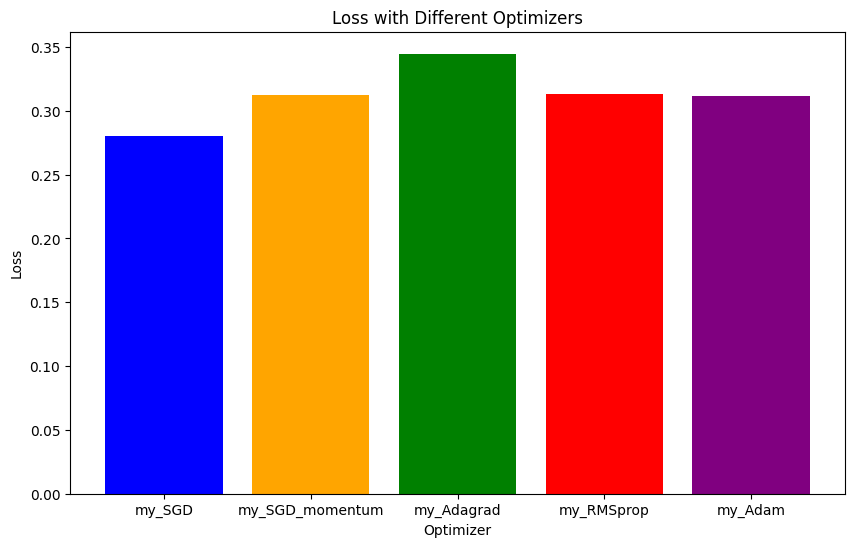

In [17]:
import matplotlib.pyplot as plt

# Extract optimizer names and corresponding loss values
optimizers = list(results.keys())
loss_values = [result[0] for result in results.values()]

# Plotting with a bar chart
plt.figure(figsize=(10, 6))
plt.bar(optimizers, loss_values, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Loss with Different Optimizers')
plt.xlabel('Optimizer')
plt.ylabel('Loss')
plt.show()
